In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
telecom_df_base=pd.read_csv('telecom_churn_data.csv', encoding='iso-8859-1')
telecom_plot_base=telecom_df_base.reset_index()
master_df=telecom_df_base.copy()
print(telecom_df_base.shape)

(99999, 226)


### Utilities Method

In [3]:
def null_na_estimator_grph(data_f,limit_val=None,graphical=False,size=(None,None)):
    """will return the % amount of null in data frame
       df: panda.DataFrame
       limit_val= (default=None) threshold value, example if limit_val=7, the estimator will return na with >=7
    """
    df=data_f.copy()
    est_ser=est_ser= (round(df.isna().sum()/len(df.index)*100,2)).sort_values(ascending=False)
    if limit_val!=None:
        est_ser= est_ser[est_ser>=limit_val]
    if graphical==True:
        df=pd.DataFrame(est_ser).reset_index()
        plt.figure(figsize=size)
        plt.xticks(rotation=90)
        fig=sns.barplot(data=df,x='index',y=0)
        fig.set_ylabel('Percentage')
        return fig
    else:
        return est_ser

In [4]:
def data_set_structure(df,return_tuple=False):
    """It will return the structure of dataframe or columns tuple as list
    out: tuple (non-num,num,month_6,month_7,month_8,month_9)
       : datafram ->structuring the complete dataset bifurcation
    """
    df_col=df.columns
    if len(df.describe().columns)!=len(df_col):
        non_num_col=df.describe(include=['object']).columns
    else:
        non_num_col=pd.Index([])
    num_col=df_col.difference(non_num_col)
    data_col_month=[x for x in df_col if re.search('_[0-9]$',x)!=None]
    col_9=[x for x in df_col if re.search('_9',x)!=None]
    col_8=[x for x in df_col if re.search('_8',x)!=None]
    col_7=[x for x in df_col if re.search('_7',x)!=None]
    col_6=[x for x in df_col if re.search('_6',x)!=None]
    col_9_n=[x for x in num_col if re.search('_9',x)!=None]
    col_8_n=[x for x in num_col if re.search('_8',x)!=None]
    col_7_n=[x for x in num_col if re.search('_7',x)!=None]
    col_6_n=[x for x in num_col if re.search('_6',x)!=None]
    
    if return_tuple==True:
        return non_num_col.tolist(),num_col.tolist(),col_6,col_7,col_8,col_9
    else:
        result=pd.DataFrame({'Month 6':[abs(len(col_6_n)-len(col_6)),len(col_6_n)],
                             'Month 7':[abs(len(col_7_n)-len(col_7)),len(col_7_n)],
                             'Month 8':[abs(len(col_8_n)-len(col_8)),len(col_8_n)],
                             'Month 9':[abs(len(col_9_n)-len(col_9)),len(col_9_n)]
                    },index=['Non-Numeric','Numeric'])
        result['Common']=[len(non_num_col)-(result.loc['Non-Numeric'].sum()),len(num_col)-(result.iloc[1,:].sum())]
        result['Total']=[result.loc['Non-Numeric'].sum(),result.loc['Numeric'].sum()]
        return result

In [5]:
def data_loss(df_old,df_new):
    """will be calculating the data loss been made in the dataframe"""
    df=pd.DataFrame({'Col loss':round(100*((len(df_old.columns)-len(df_new.columns))/len(df_old.columns)),2),
                    'Row loss':round(100*((len(df_old.index)-len(df_new.index))/len(df_old.index)),2),
                    'Data Retained':round(100*(len(df_new.columns)*len(df_new.index))/(len(df_old.columns)*len(df_old.index)),2)},index=['Percentage'])
    return df

In [6]:
def val_variance_estimator(dataFrame,graphical=False,size=(None,None),graph_filter_limit_max=0):
    variance_graph={}
    for i in range(0,len(dataFrame.columns)):
        variance_graph[dataFrame.columns[i]]=len(dataFrame.loc[:,dataFrame.columns[i]].unique())
    variance_graph_df=pd.DataFrame({'var':list(variance_graph.keys()),'count':list(variance_graph.values())})
    if graphical==True:
        plt.figure(figsize=size)
        plt.xticks(rotation=90)
        text_title='Value Variance Graph < '+str(graph_filter_limit_max)
        plt.title(text_title)
        fig=sns.barplot(x='var',y='count',data=variance_graph_df[variance_graph_df['count']<graph_filter_limit_max].sort_values(by='count',ascending=True))
        return fig
    else:
        return variance_graph_df

### EDA

##### An overview of data points and it's shape

In [7]:
print(telecom_df_base.info())
telecom_df_base.iloc[:,1:20].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26


#### Review and fix structural error

##### Correcting naming convention for some columns

In [8]:
telecom_df_base.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)
telecom_df_base[['vbc_3g_6','vbc_3g_7','vbc_3g_8','vbc_3g_9']].head()

,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9
0,101.20,0.0,30.4,3.58
1,0.00,0.0,0.0,0.00
2,4.17,0.0,0.0,0.00
3,0.00,0.0,0.0,0.00
4,0.00,0.0,0.0,0.00


In [9]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_df_base,return_tuple=True)
data_set_structure(telecom_df_base).head()

,Month 6,Month 7,Month 8,Month 9,Common,Total
Non-Numeric,3,3,3,3,0,12
Numeric,52,52,52,52,6,214


#### Exploring null/na in data set

##### Exploring data points variance

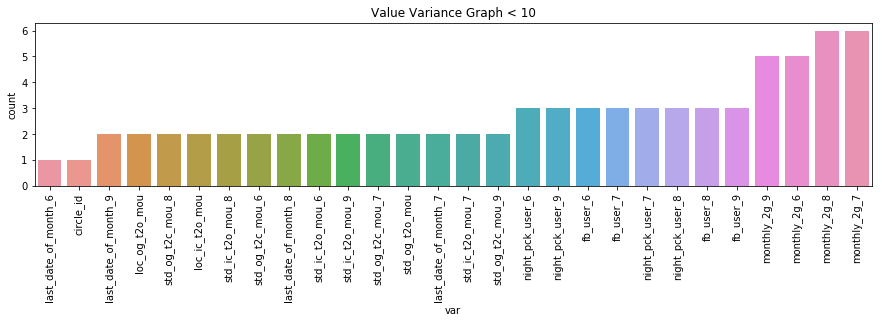

In [10]:
variance_graph_df=val_variance_estimator(telecom_df_base)
val_variance_estimator(telecom_df_base,True,(15,3),graph_filter_limit_max=10)

##### Dropping columns not having much information to add to analysis

In [11]:
#Revisiting the data which don't have variance equal to 1 or 2
variance_graph_df[variance_graph_df['count']<=2]['var']
for i in variance_graph_df[variance_graph_df['count']<=2]['var']:
    print(i," :",telecom_df_base.loc[:,i].unique())
drop_col=list(variance_graph_df[variance_graph_df['count']<=2]['var'])
#Dropping columns with just 2 values
print("As the value of these columns just have 2 values, which is not adding any information, we are going to drop them. As imputing them doesn't make sense")
telecom_df_base.drop(columns=drop_col,inplace=True)

last_date_of_month_9  : ['9/30/2014' nan]
last_date_of_month_7  : ['7/31/2014' nan]
std_ic_t2o_mou_9  : [nan  0.]
std_ic_t2o_mou_6  : [nan  0.]
last_date_of_month_8  : ['8/31/2014' nan]
std_ic_t2o_mou_8  : [ 0. nan]
circle_id  : [109]
loc_ic_t2o_mou  : [ 0. nan]
loc_og_t2o_mou  : [ 0. nan]
std_og_t2c_mou_9  : [nan  0.]
std_og_t2c_mou_6  : [nan  0.]
last_date_of_month_6  : ['6/30/2014']
std_og_t2c_mou_8  : [ 0. nan]
std_ic_t2o_mou_7  : [nan  0.]
std_og_t2c_mou_7  : [nan  0.]
std_og_t2o_mou  : [ 0. nan]
As the value of these columns just have 2 values, which is not adding any information, we are going to drop them. As imputing them doesn't make sense


In [12]:
print(data_loss(master_df,telecom_df_base))
data_set_structure(telecom_df_base).head()

            Col loss  Data Retained  Row loss
Percentage      7.08          92.92       0.0


,Month 6,Month 7,Month 8,Month 9,Common,Total
Non-Numeric,2,2,2,2,0,8
Numeric,50,50,50,50,2,202


##### Checking null or na

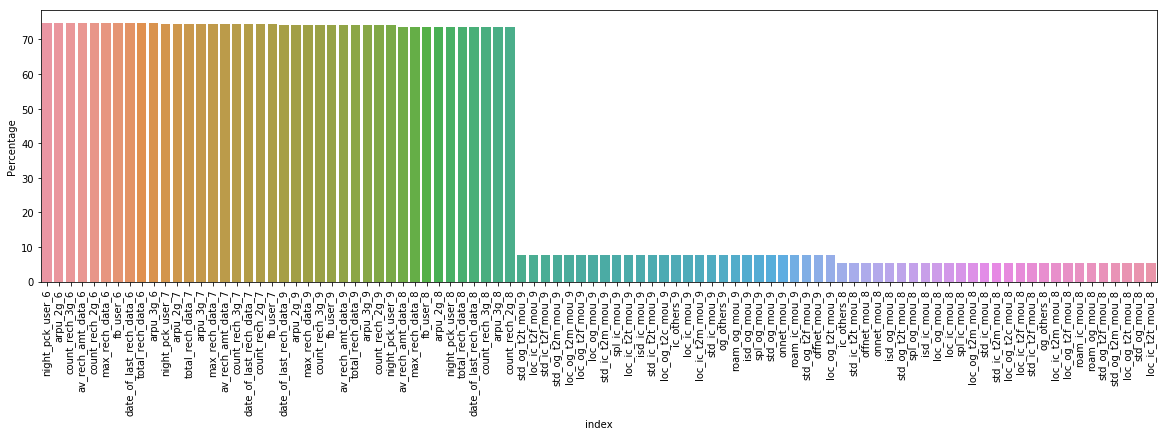

In [13]:
null_na_estimator_grph(telecom_df_base,5,graphical=True,size=(20,5))

##### Imputing features important of modeling

In [14]:
#As some columns will be used in analysis and the value range is only between 0,1,na, we are going to impute them with a new class i.e. -1 for na

for i in variance_graph_df.loc[(variance_graph_df['count']==3)]['var']:
    print(i," :",telecom_df_base.loc[:,i].unique())
impute_col=list(variance_graph_df[variance_graph_df['count']==3]['var'])

print("Imputing a new category of -1 reprsenting a miss: ",impute_col)

telecom_df_base[impute_col]=telecom_df_base[impute_col].fillna(-1)
impute_col=['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
            'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
            'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']

print("Imputing 0 for missing values: ",impute_col)
telecom_df_base[impute_col]=telecom_df_base[impute_col].fillna(0)

fb_user_8  : [ 1. nan  0.]
night_pck_user_8  : [ 0. nan  1.]
night_pck_user_7  : [ 0. nan  1.]
fb_user_6  : [ 1. nan  0.]
fb_user_7  : [ 1. nan  0.]
fb_user_9  : [nan  1.  0.]
night_pck_user_9  : [nan  0.  1.]
night_pck_user_6  : [ 0. nan  1.]
Imputing a new category of -1 reprsenting a miss:  ['fb_user_8', 'night_pck_user_8', 'night_pck_user_7', 'fb_user_6', 'fb_user_7', 'fb_user_9', 'night_pck_user_9', 'night_pck_user_6']
Imputing 0 for missing values:  ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']


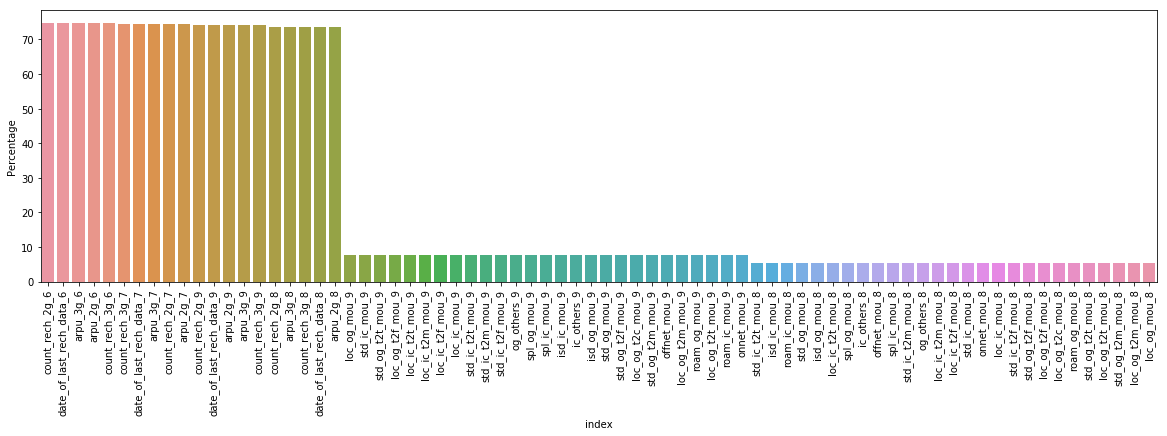

In [15]:
null_na_estimator_grph(telecom_df_base,5,graphical=True,size=(20,5))

In [16]:
telecom_df_base[impute_col].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0
1,0.0,154.0,50.0,0.0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0
2,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


##### Creating High value customer filter set

In [17]:
hv_filter_col=['total_rech_amt_6','total_rech_data_6','total_rech_amt_7','total_rech_data_7',
'total_rech_amt_8','total_rech_data_8','total_rech_amt_9','total_rech_data_9']
#hv_filter_col=['total_rech_amt_6','total_rech_data_6','total_rech_num_6','total_rech_num_7','total_rech_amt_7','total_rech_data_7','total_rech_num_8','total_rech_amt_8','total_rech_data_8','total_rech_num_9','total_rech_amt_9','total_rech_data_9']
print("PRE-Computation: analysis for na/null\n",telecom_df_base[hv_filter_col].isnull().sum())

PRE-Computation: analysis for na/null
 total_rech_amt_6     0
total_rech_data_6    0
total_rech_amt_7     0
total_rech_data_7    0
total_rech_amt_8     0
total_rech_data_8    0
total_rech_amt_9     0
total_rech_data_9    0
dtype: int64


##### Filtering high value customers data

In [18]:
print("Filtering high value customers")
telecom_df_base['total_month_rech_6']=telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[1]]
telecom_df_base['total_month_rech_7']=telecom_df_base.loc[:,hv_filter_col[2]]+telecom_df_base.loc[:,hv_filter_col[3]]
telecom_df_base['total_month_rech_8']=telecom_df_base.loc[:,hv_filter_col[4]]+telecom_df_base.loc[:,hv_filter_col[5]]
telecom_df_base['total_month_rech_9']=telecom_df_base.loc[:,hv_filter_col[6]]+telecom_df_base.loc[:,hv_filter_col[7]]
#telecom_df_base.to_csv('prehighvalue.csv')
hv_percentile=(telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[3]]).quantile(.7)
telecom_df_base=telecom_df_base[telecom_df_base.loc[:,hv_filter_col[0]]+telecom_df_base.loc[:,hv_filter_col[3]]>=hv_percentile]
telecom_df_base.reset_index(inplace=True)
print("Dimension of High value customer dataset: ",telecom_df_base.shape)

Filtering high value customers
Dimension of High value customer dataset:  (30061, 215)


##### Converting churn=1 not-churn=0

In [19]:
telecom_df_base['churn']=((telecom_df_base['total_ic_mou_9']+telecom_df_base['total_og_mou_9']>0) & (telecom_df_base['vol_2g_mb_9']+telecom_df_base['vol_3g_mb_9'])>0)
telecom_df_base.loc[:,'churn'].replace({True:1,False:0},inplace=True)

Text(0.5,1,'Telcom Churn Rate')

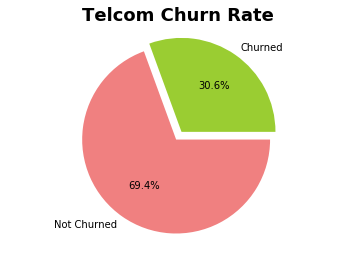

In [20]:
plt.pie(x=[len(telecom_df_base[telecom_df_base['churn']==1]),len(telecom_df_base[telecom_df_base['churn']==0])],labels=['Churned','Not Churned'],autopct='%1.1f%%',colors=['yellowgreen', 'lightcoral'],explode=(.1,0))
plt.axis('equal')
plt.title('Telcom Churn Rate',fontsize=18,fontweight='bold')

##### Seprating Prediction and Training Data 

### NEW Analysis

#### FOR DATE COLUMS

In [80]:
date_col=[x for x in telecom_df_base.columns if re.search('date',x)!=None]
null_date_col=null_na_estimator_grph(telecom_df_base[date_col],limit_val=0)
null_date_col

date_of_last_rech_data_7    64.33
date_of_last_rech_data_9    63.75
date_of_last_rech_data_8    62.85
date_of_last_rech_data_6    60.90
date_of_last_rech_9          3.91
date_of_last_rech_8          3.05
date_of_last_rech_7          1.23
date_of_last_rech_6          0.00
dtype: float64

#### Now from above it looks like the date_of_last_rech_data_6/7/8/9 having 64 % of data as empty. Instead of impueting these variables at random the best opted way is to impute it wil date_of_last_rech which will result in duplication of the data, so we go ahead and drop these 4 cols and will focus on date_of_last_rech_6/7/8/9

In [81]:
print("We can validate that for the data where date_of_last_rech_6/7/8/9 is having null the respective data column is also null")
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_6'].isnull() & telecom_df_base['date_of_last_rech_data_6'].isnull()])/len(telecom_df_base.index)*100,2))
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_7'].isnull() & telecom_df_base['date_of_last_rech_data_7'].isnull()])/len(telecom_df_base.index)*100,2))
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_8'].isnull() & telecom_df_base['date_of_last_rech_data_8'].isnull()])/len(telecom_df_base.index)*100,2))
print(round(len(telecom_df_base[telecom_df_base['date_of_last_rech_9'].isnull() & telecom_df_base['date_of_last_rech_data_9'].isnull()])/len(telecom_df_base.index)*100,2))

We can validate that for the data where date_of_last_rech_6/7/8/9 is having null the respective data column is also null
0.0
1.23
3.05
3.91


In [82]:
date_df=telecom_df_base[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn']]
print(date_df.shape)
print(null_na_estimator_grph(date_df,limit_val=.2))
date_df.dropna(subset=['date_of_last_rech_6','date_of_last_rech_8','date_of_last_rech_7'],inplace=True)
print(date_df.shape)

(30061, 4)
date_of_last_rech_8    3.05
date_of_last_rech_7    1.23
dtype: float64
(28947, 4)


C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [83]:
for col in date_df.columns.drop('churn'):
    date_df[col]=pd.to_datetime(date_df[col],format="%m/%d/%Y")
date_df['day_6']=date_df['date_of_last_rech_6'].apply(lambda x: x.day)
date_df['day_7']=date_df['date_of_last_rech_7'].apply(lambda x: x.day)
date_df['day_8']=date_df['date_of_last_rech_8'].apply(lambda x: x.day)

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Text(0.5,1,'August churn rate')

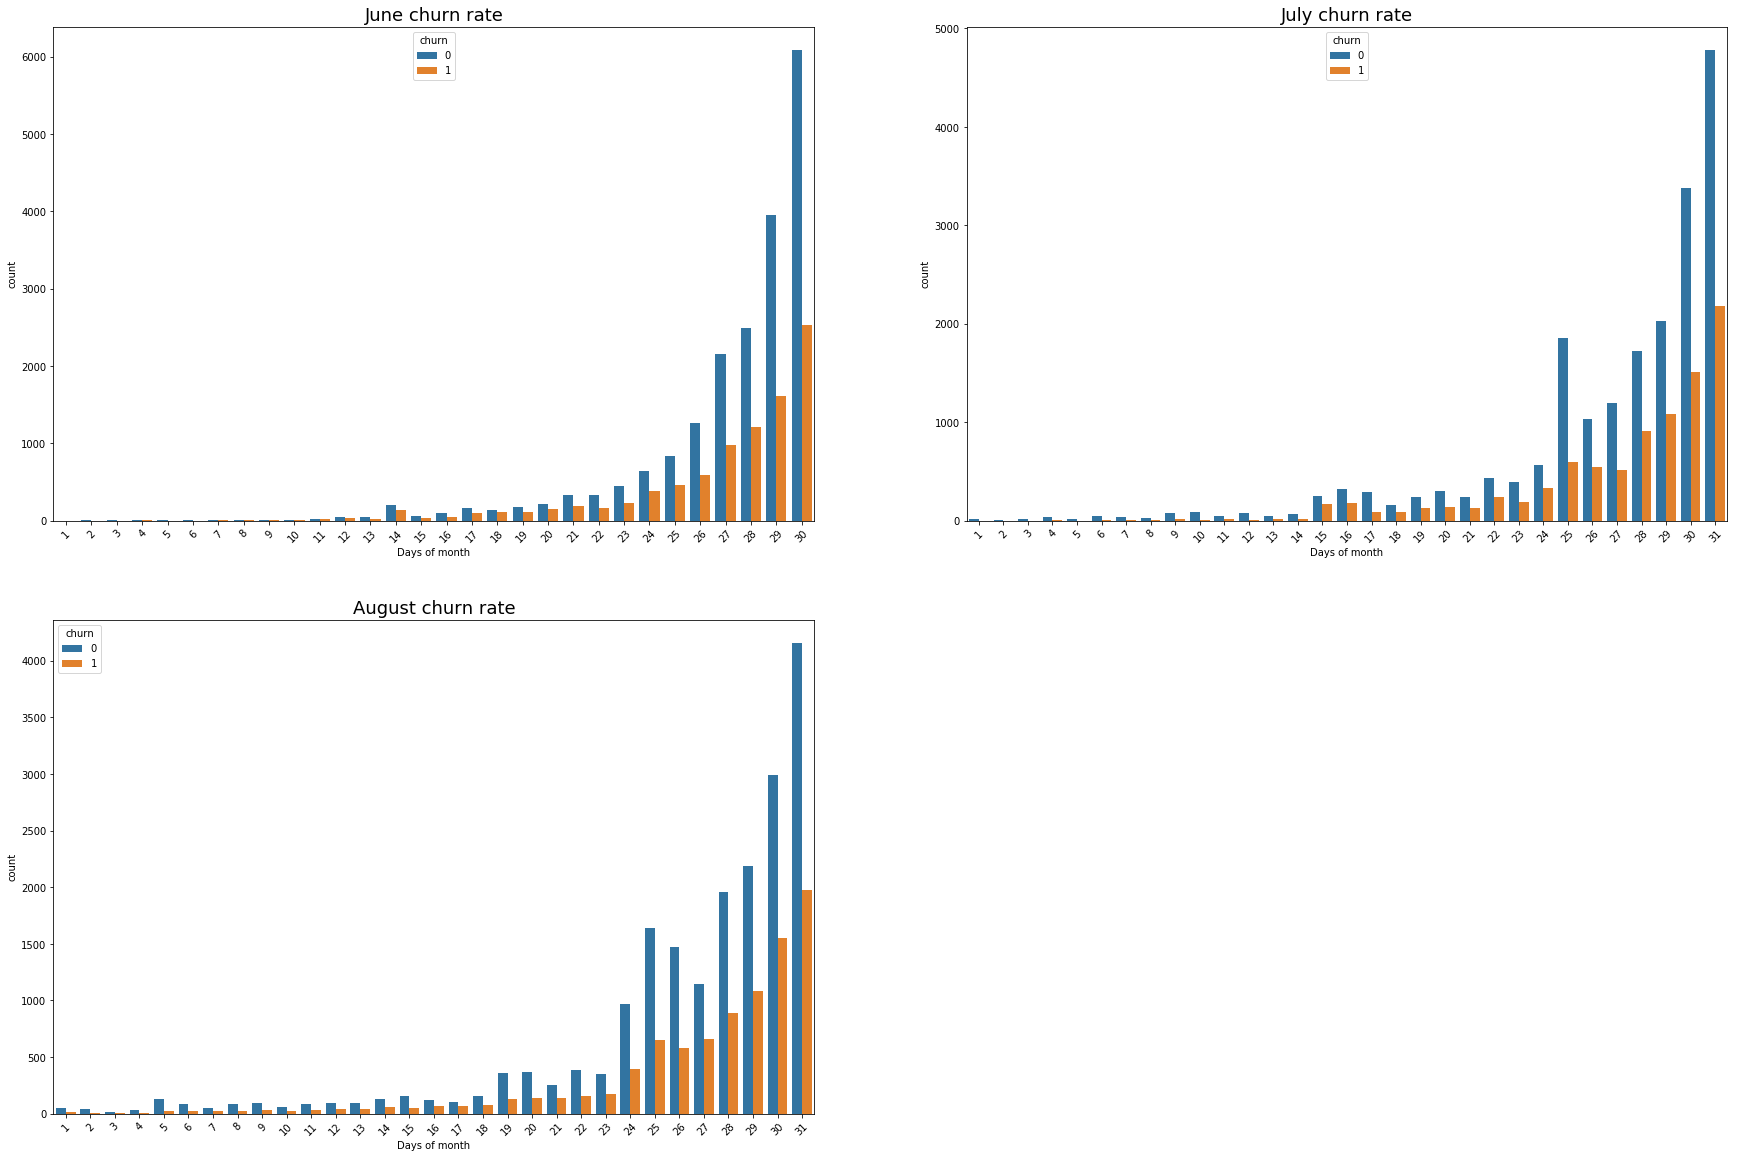

In [84]:
plt.figure(figsize=(30,20))
plt.subplot(221)
plt.xticks(rotation=45)
plt.title("June churn rate",fontsize=18)
sns.countplot(x='day_6',hue='churn',data=date_df.sort_values(by='day_6'))
plt.xlabel('Days of month')
#plt.figure(figsize=(10,5))
plt.subplot(222)
plt.xticks(rotation=45)
sns.countplot(x='day_7',hue='churn',data=date_df.sort_values(by='day_7'))
plt.xlabel('Days of month')
plt.title("July churn rate",fontsize=18)
plt.subplot(223)
#plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(x='day_8',hue='churn',data=date_df.sort_values(by='day_8'))
plt.xlabel('Days of month')
plt.title("August churn rate",fontsize=18)

## We should consider dropping date columns and replace them by day as it show a correlation

In [85]:
print(telecom_df_base.shape)
telecom_df_base=pd.concat([telecom_df_base,date_df[['day_6','day_7','day_8']]],axis=1)

(30061, 219)


In [86]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_df_base,return_tuple=True)
telecom_data_analysis=telecom_df_base.drop(columns=non_num_col+col_9,axis=1)

In [87]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_data_analysis,return_tuple=True)

In [88]:
#print(col_6)
#col_6.sort()
print(col_6)

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6', 'vbc_3g_6', 'total_month_rech_6', 'day_6', 'day_6']


## As mentioned by mail from Sumeet 
###### For each category (level) of a categorical variable, compute the churn rate (i.e. no. of churn/non-churn + churn), which will be a number (fraction)

#### Our analysis

In [89]:
#telecom_data_analysis[['total_ic_mou_6', 'total_month_rech_6', 'total_og_mou_6','total_rech_num_6','count_rech_2g_6', 'count_rech_3g_6']]
null_na_estimator_grph(telecom_data_analysis[['sachet_2g_6','sachet_3g_6','monthly_3g_6','monthly_2g_6',
                                  'sachet_2g_7','sachet_3g_7','monthly_3g_7','monthly_2g_7',
                                  'sachet_2g_8','sachet_3g_8','monthly_3g_8','monthly_2g_8']],limit_val=0)

monthly_2g_8    0.0
monthly_3g_8    0.0
sachet_3g_8     0.0
sachet_2g_8     0.0
monthly_2g_7    0.0
monthly_3g_7    0.0
sachet_3g_7     0.0
sachet_2g_7     0.0
monthly_2g_6    0.0
monthly_3g_6    0.0
sachet_3g_6     0.0
sachet_2g_6     0.0
dtype: float64

In [90]:
val_variance_estimator(telecom_data_analysis[['sachet_2g_6','sachet_3g_6','monthly_3g_6','monthly_2g_6',
                                  'sachet_2g_7','sachet_3g_7','monthly_3g_7','monthly_2g_7',
                                  'sachet_2g_8','sachet_3g_8','monthly_3g_8','monthly_2g_8']])

,count,var
0,27,sachet_3g_7
1,12,monthly_3g_6
2,5,monthly_2g_6
3,6,monthly_2g_7
4,30,sachet_2g_6
5,29,sachet_3g_8
6,33,sachet_2g_8
7,32,sachet_2g_7
8,15,monthly_3g_7
9,25,sachet_3g_6


In [91]:
data_usage=telecom_data_analysis[['sachet_2g_6','sachet_3g_6','monthly_3g_6','monthly_2g_6',
                                  'sachet_2g_7','sachet_3g_7','monthly_3g_7','monthly_2g_7',
                                  'sachet_2g_8','sachet_3g_8','monthly_3g_8','monthly_2g_8',
                                  'churn']]

In [92]:
#print(data_usage_100.head(30))
data_usage['Data_user_6']=(data_usage['monthly_3g_6']>0)|(data_usage['monthly_2g_6']>0)|(data_usage['sachet_3g_6']>0)|(data_usage['sachet_2g_6']>0)
data_usage['Data_user_7']=(data_usage['monthly_3g_7']>0)|(data_usage['monthly_2g_7']>0)|(data_usage['sachet_3g_7']>0)|(data_usage['sachet_2g_7']>0)
data_usage['Data_user_8']=(data_usage['monthly_3g_8']>0)|(data_usage['monthly_2g_8']>0)|(data_usage['sachet_3g_8']>0)|(data_usage['sachet_2g_8']>0)

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [93]:
data_usage['Data_user_goodPhase']=(data_usage['Data_user_6'])|(data_usage['Data_user_7'])
data_usage['Data_user_completePhase']=(data_usage['Data_user_6'])|(data_usage['Data_user_7'])|(data_usage['Data_user_8'])

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Churn -June + July+August')

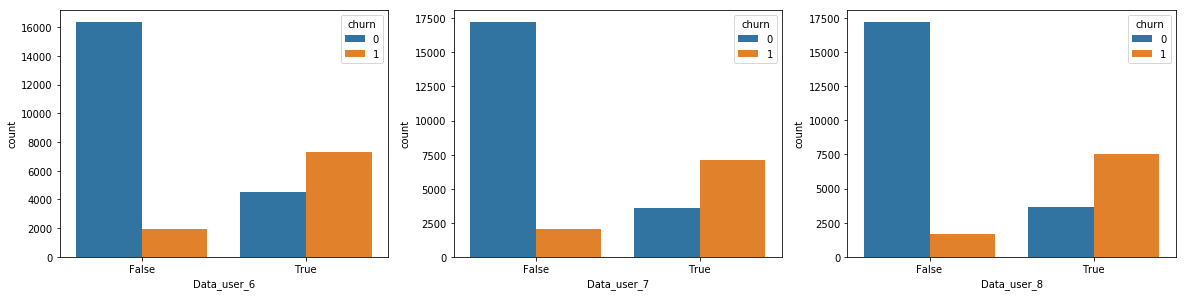

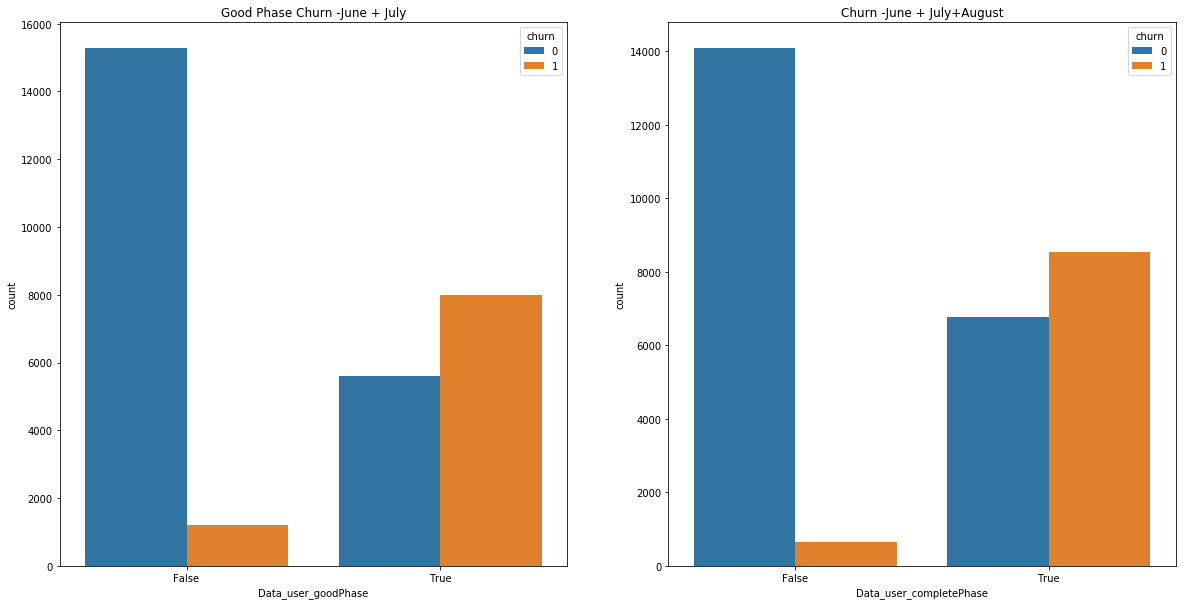

In [94]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=data_usage,x='Data_user_6',hue='churn')
plt.subplot(2,3,2)
sns.countplot(data=data_usage,x='Data_user_7',hue='churn')
plt.subplot(2,3,3)
sns.countplot(data=data_usage,x='Data_user_8',hue='churn')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(data=data_usage,x='Data_user_goodPhase',hue='churn')
plt.title('Good Phase Churn -June + July')
plt.subplot(1,2,2)
sns.countplot(data=data_usage,x='Data_user_completePhase',hue='churn')
plt.title('Churn -June + July+August')

### Consideration two: as we have lot of values under sachet and monthly packages, it will not be viable to go into each offering i.e. sachet types. But we can think from a usage persepctive as to if the user is using data-service or not and how it impacts the churn.

#### the above can be an insight full factor as it will relate to if the users if churning because of some service

###  New Analaysis 2

In [95]:
# dropping aggregated columns
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_data_analysis,return_tuple=True)

In [96]:
### BELOW COLUMNS CAN BE DROPPED AS WE HAVE CAPTURED THE USAGE PATTERN IN THE NEW COLUMSN I.E. Data_user_6,Data_user_7,Data_user_8
### AND Data_user_goodPhase, Data_user_completePhase
telecom_data_analysis.drop(['sachet_2g_6','sachet_3g_6','monthly_3g_6','monthly_2g_6',
                                  'sachet_2g_7','sachet_3g_7','monthly_3g_7','monthly_2g_7',
                                  'sachet_2g_8','sachet_3g_8','monthly_3g_8','monthly_2g_8',
                                  'churn'],axis=1,inplace=True)

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [99]:
data_usage['Data_user_6']=data_usage['Data_user_6'].replace({True:1,False:0})
data_usage['Data_user_7']=data_usage['Data_user_7'].replace({True:1,False:0})
data_usage['Data_user_8']=data_usage['Data_user_8'].replace({True:1,False:0})
data_usage['Data_user_goodPhase']=data_usage['Data_user_goodPhase'].replace({True:1,False:0})
data_usage['Data_user_completePhase']=data_usage['Data_user_completePhase'].replace({True:1,False:0})

C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\DS_3_6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [101]:
pd.concat([telecom_data_analysis,data_usage[['Data_user_6','Data_user_7','Data_user_8','Data_user_goodPhase', 'Data_user_completePhase']]],axis=1)

,index,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,day_7,day_8,day_6,day_7,day_8,Data_user_6,Data_user_7,Data_user_8,Data_user_goodPhase,Data_user_completePhase
0,6,7001051193,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,...,31.0,28.0,28.0,31.0,28.0,0,0,0,0,0
1,7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,...,25.0,26.0,27.0,25.0,26.0,0,0,0,0,0
2,8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,...,31.0,30.0,25.0,31.0,30.0,0,1,1,1,1
3,13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,...,22.0,30.0,20.0,22.0,30.0,0,0,1,0,1
4,16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,...,31.0,14.0,30.0,31.0,14.0,0,0,0,0,0
5,17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,...,30.0,25.0,30.0,30.0,25.0,0,0,0,0,0
6,20,7001028254,271.699,421.474,364.251,72.41,86.73,71.18,198.84,225.38,...,10.0,27.0,14.0,10.0,27.0,0,0,0,0,0
7,21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,...,31.0,31.0,30.0,31.0,31.0,0,0,0,0,0
8,24,7001125315,422.050,359.730,354.793,124.19,55.19,141.11,450.33,370.48,...,17.0,31.0,23.0,17.0,31.0,0,0,0,0,0
9,33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,...,30.0,26.0,30.0,30.0,26.0,1,1,1,1,1


In [102]:
telecom_data_analysis.head()

,index,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,vbc_3g_6,total_month_rech_6,total_month_rech_7,total_month_rech_8,day_6,day_7,day_8,day_6,day_7,day_8
0,6,7001051193,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,...,0.00,499.0,222.0,294.0,28.0,31.0,28.0,28.0,31.0,28.0
1,7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,...,18.74,1580.0,790.0,3638.0,27.0,25.0,26.0,27.0,25.0,26.0
2,8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,...,122.16,437.0,603.0,123.0,25.0,31.0,30.0,25.0,31.0,30.0
3,13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,...,0.00,507.0,253.0,720.0,20.0,22.0,30.0,20.0,22.0,30.0
4,16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,...,21.89,570.0,348.0,160.0,30.0,31.0,14.0,30.0,31.0,14.0


In [67]:
non_num_col,num_col,col_6,col_7,col_8,col_9=data_set_structure(telecom_data_analysis,return_tuple=True)

In [68]:
num_col

['aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'day_6',
 'day_7',
 'day_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'index',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t